In [1]:
import os
curr_dir = os.getcwd()
dataset_dir = os.path.join(curr_dir,'Dataset')

In [2]:
os.listdir(dataset_dir)

['kannada_offensive_dev.csv',
 'kannada_offensive_dev2.csv',
 'kannada_offensive_dev_corrected.csv',
 'kannada_offensive_train.csv',
 'kannada_offensive_train2.csv',
 'kannada_offensive_train_corrected.csv',
 'mal_full_offensive_dev.csv',
 'mal_full_offensive_dev_corrected.csv',
 'mal_full_offensive_train.csv',
 'mal_full_offensive_train_corrected.csv',
 'tamil_offensive_full_dev.csv',
 'tamil_offensive_full_dev_corrected.csv',
 'tamil_offensive_full_train.csv',
 'tamil_offensive_full_train_corrected.csv']

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1 = pd.read_csv(os.path.join(dataset_dir,'kannada_offensive_train2.csv'))

In [5]:
df1

,Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira\tNot_offensive
0,Anyone from kerala here\tnot-Kannada
1,Movie rerelease madi plss\tNot_offensive
2,Amazon prime alli bittidira....yella manele no...
3,Guru sure news nanu tik tok dawn lod madeda ya...
4,ಸುದೀಪ್ ಸರ್ ಅಂಡ್ ದರ್ಶನ್ ಸರ್ ಅವರಿಗೆ ಇರೋ ಫ್ಯಾನ್ಸ್...
...,...
6211,@Gajendra hv neen en maadirodu mele\tOffensive...
6212,Sir neev adthidda game yavdu\tNot_offensive
6213,Dubb Full movie in telugu\tNot_offensive
6214,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...


In [6]:
df1.columns.values[0]

'Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira\tNot_offensive'

In [7]:
def split_text_on_tabs(text):
    import re
    s = re.split('\t',str(text))
    #print(s)
    return [s[0] , s[1]]

In [8]:
def count_tabs_on_text(text):
    import re
    s = re.split('\t',str(text))
    #print(s)
    return len(s) - 1

In [9]:
x , y = split_text_on_tabs('i am nikhil\t ghanghor')

In [11]:
df = df1['Tik tok alli jagala madtidralla adra baggenu ondu video madi anna super agi ugididdira\tNot_offensive'].apply(count_tabs_on_text)
for i,val in enumerate(df):
    if val!=1:
        print(i)

In [11]:
df1.iloc[2398,:].values[0]

'ನನಗು same ಹಂಗೇ ಅನ್ನಿಸ್ತು\t\tNot_offensive'

In [12]:
df1.iloc[2524,:].values[0]

'Flare gun at 1\t30\tnot-Kannada'

In [13]:
df1.drop([2398,2524],axis = 0,inplace = True)

In [14]:
df1.reset_index(drop = True,inplace = True)
df1

,column
0,Tik tok alli jagala madtidralla adra baggenu o...
1,Anyone from kerala here\tnot-Kannada
2,Movie rerelease madi plss\tNot_offensive
3,Amazon prime alli bittidira....yella manele no...
4,Guru sure news nanu tik tok dawn lod madeda ya...
...,...
6210,@Gajendra hv neen en maadirodu mele\tOffensive...
6211,Sir neev adthidda game yavdu\tNot_offensive
6212,Dubb Full movie in telugu\tNot_offensive
6213,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...


In [15]:
length = len(df1)
length

6215

In [16]:
df1.loc[length] = ['ನನಗು same ಹಂಗೇ ಅನ್ನಿಸ್ತು\tNot_offensive']
df1

,column
0,Tik tok alli jagala madtidralla adra baggenu o...
1,Anyone from kerala here\tnot-Kannada
2,Movie rerelease madi plss\tNot_offensive
3,Amazon prime alli bittidira....yella manele no...
4,Guru sure news nanu tik tok dawn lod madeda ya...
...,...
6211,Sir neev adthidda game yavdu\tNot_offensive
6212,Dubb Full movie in telugu\tNot_offensive
6213,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...
6214,Sir Nimm Mathininda Navu Kalibeku Agirodu Ennu...


In [17]:
length = len(df1)
length

6216

In [18]:
df1.loc[length] = ['Flare gun at 1:30\tnot-Kannada']
df1

,column
0,Tik tok alli jagala madtidralla adra baggenu o...
1,Anyone from kerala here\tnot-Kannada
2,Movie rerelease madi plss\tNot_offensive
3,Amazon prime alli bittidira....yella manele no...
4,Guru sure news nanu tik tok dawn lod madeda ya...
...,...
6212,Dubb Full movie in telugu\tNot_offensive
6213,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...
6214,Sir Nimm Mathininda Navu Kalibeku Agirodu Ennu...
6215,ನನಗು same ಹಂಗೇ ಅನ್ನಿಸ್ತು\tNot_offensive


In [19]:
df1['text'],df1['label'] = zip(*df1.apply(lambda x: split_text_on_tabs(x["column"]), axis=1))
df1

,column,text,label
0,Tik tok alli jagala madtidralla adra baggenu o...,Tik tok alli jagala madtidralla adra baggenu o...,Not_offensive
1,Anyone from kerala here\tnot-Kannada,Anyone from kerala here,not-Kannada
2,Movie rerelease madi plss\tNot_offensive,Movie rerelease madi plss,Not_offensive
3,Amazon prime alli bittidira....yella manele no...,Amazon prime alli bittidira....yella manele no...,Not_offensive
4,Guru sure news nanu tik tok dawn lod madeda ya...,Guru sure news nanu tik tok dawn lod madeda ya...,Not_offensive
...,...,...,...
6212,Dubb Full movie in telugu\tNot_offensive,Dubb Full movie in telugu,Not_offensive
6213,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...,Not_offensive
6214,Sir Nimm Mathininda Navu Kalibeku Agirodu Ennu...,Sir Nimm Mathininda Navu Kalibeku Agirodu Ennu...,Not_offensive
6215,ನನಗು same ಹಂಗೇ ಅನ್ನಿಸ್ತು\tNot_offensive,ನನಗು same ಹಂಗೇ ಅನ್ನಿಸ್ತು,Not_offensive


In [20]:
df1.drop('column',axis = 1,inplace = True)

In [21]:
df1

,text,label
0,Tik tok alli jagala madtidralla adra baggenu o...,Not_offensive
1,Anyone from kerala here,not-Kannada
2,Movie rerelease madi plss,Not_offensive
3,Amazon prime alli bittidira....yella manele no...,Not_offensive
4,Guru sure news nanu tik tok dawn lod madeda ya...,Not_offensive
...,...,...
6212,Dubb Full movie in telugu,Not_offensive
6213,Mostly nimma mate keli tic tok ban agirbeku ಅಣ...,Not_offensive
6214,Sir Nimm Mathininda Navu Kalibeku Agirodu Ennu...,Not_offensive
6215,ನನಗು same ಹಂಗೇ ಅನ್ನಿಸ್ತು,Not_offensive


In [22]:
df1['label'].value_counts()

Not_offensive                           3544
not-Kannada                             1522
Offensive_Targeted_Insult_Individual     487
Offensive_Targeted_Insult_Group          329
Offensive_Untargetede                    212
Offensive_Targeted_Insult_Other          123
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

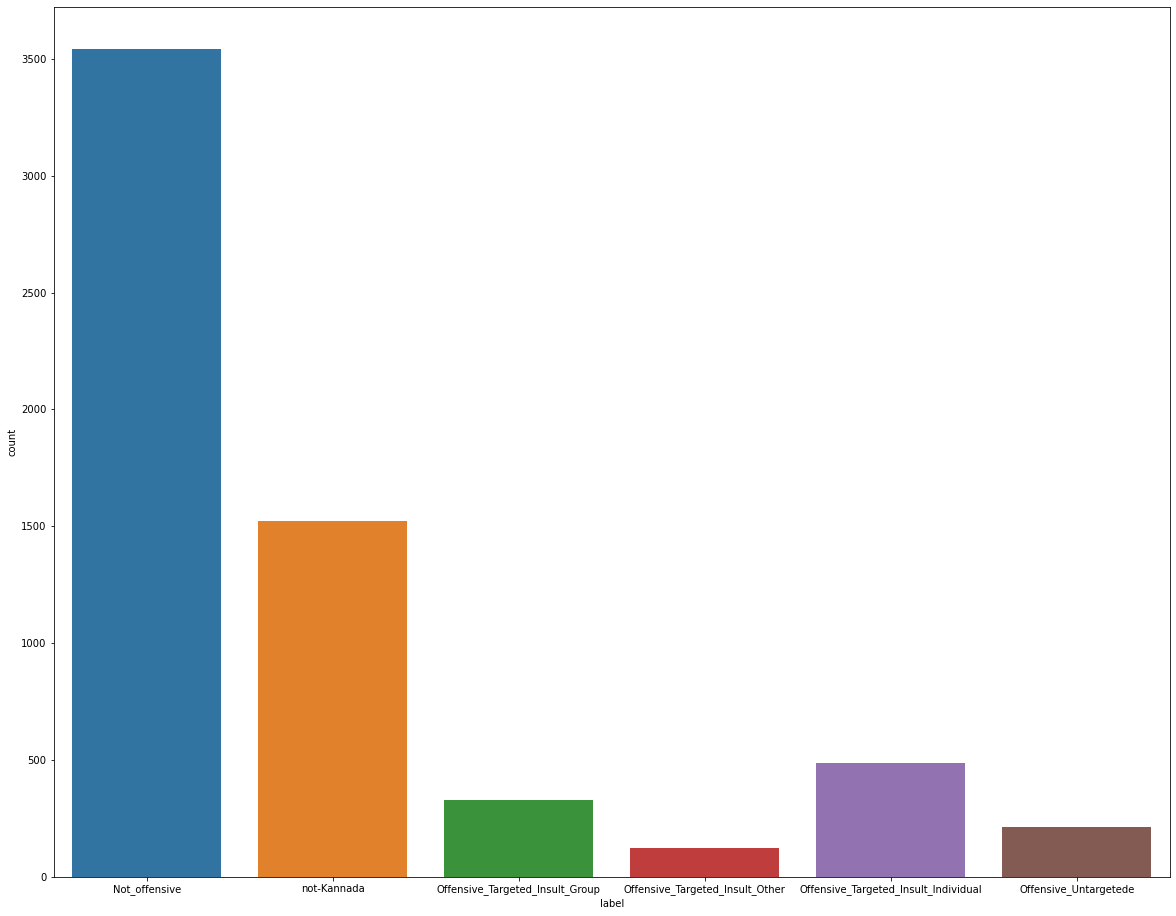

In [23]:
plt.figure(figsize = (20,16))
sns.countplot(x = df1['label'])

In [24]:
df1.to_csv(os.path.join(dataset_dir,'kannada_offensive_train_corrected.csv'),index = False)

In [25]:
df2 = pd.read_csv(os.path.join(dataset_dir,'kannada_offensive_dev.csv'))
df2

,column
0,100 days pakka\tNot_offensive
1,Super sir\tnot-Kannada
2,Hands up\tnot-Kannada
3,Sari nivu video na roast madi adre madvaga pub...
4,Krishana shapa tatteleebeku\tNot_offensive
...,...
772,Nanu kuda direction course kalita iddene...nim...
773,Ninige bere kelsa ilvaa madoke\tOffensive_Targ...
774,മലയാളീസ് ഹാൻഡ്‌സ് അപ്പ്‌\tnot-Kannada
775,ದರ್ಶನ್ ಅಭಿಮಾನಿಗಳ ಕಡೆಯಿಂದ ಆಲ್ ದ ಬೆಸ್ಟ್ ಆಲ್ ದ ಬೆ...


In [26]:
df = df2['column'].apply(count_tabs_on_text)
for i,val in enumerate(df):
    if val!=1:
        print(i)

776


In [27]:
df2.iloc[776]['column'] 

'ಕಥೆಯಲ್ಲಿ ದಮ್ ಇಲ್ಲ\tOffensive_Targeted_Insult_Group\t'

In [28]:
df2.loc[776:'column'] = 'ಕಥೆಯಲ್ಲಿ ದಮ್ ಇಲ್ಲ\tOffensive_Targeted_Insult_Group'

In [29]:
df = df2['column'].apply(count_tabs_on_text)
for i,val in enumerate(df):
    if val!=1:
        print(i)

In [30]:
df2.iloc[776].column

'ಕಥೆಯಲ್ಲಿ ದಮ್ ಇಲ್ಲ\tOffensive_Targeted_Insult_Group'

In [31]:
df2['text'],df2['label'] = zip(*df2.apply(lambda x: split_text_on_tabs(x["column"]), axis=1))
df2

,column,text,label
0,100 days pakka\tNot_offensive,100 days pakka,Not_offensive
1,Super sir\tnot-Kannada,Super sir,not-Kannada
2,Hands up\tnot-Kannada,Hands up,not-Kannada
3,Sari nivu video na roast madi adre madvaga pub...,Sari nivu video na roast madi adre madvaga pub...,Not_offensive
4,Krishana shapa tatteleebeku\tNot_offensive,Krishana shapa tatteleebeku,Not_offensive
...,...,...,...
772,Nanu kuda direction course kalita iddene...nim...,Nanu kuda direction course kalita iddene...nim...,Not_offensive
773,Ninige bere kelsa ilvaa madoke\tOffensive_Targ...,Ninige bere kelsa ilvaa madoke,Offensive_Targeted_Insult_Individual
774,മലയാളീസ് ഹാൻഡ്‌സ് അപ്പ്‌\tnot-Kannada,മലയാളീസ് ഹാൻഡ്‌സ് അപ്പ്‌,not-Kannada
775,ದರ್ಶನ್ ಅಭಿಮಾನಿಗಳ ಕಡೆಯಿಂದ ಆಲ್ ದ ಬೆಸ್ಟ್ ಆಲ್ ದ ಬೆ...,ದರ್ಶನ್ ಅಭಿಮಾನಿಗಳ ಕಡೆಯಿಂದ ಆಲ್ ದ ಬೆಸ್ಟ್ ಆಲ್ ದ ಬೆ...,Not_offensive


In [32]:
df2.drop('column',axis = 1,inplace = True)

In [33]:
df2

,text,label
0,100 days pakka,Not_offensive
1,Super sir,not-Kannada
2,Hands up,not-Kannada
3,Sari nivu video na roast madi adre madvaga pub...,Not_offensive
4,Krishana shapa tatteleebeku,Not_offensive
...,...,...
772,Nanu kuda direction course kalita iddene...nim...,Not_offensive
773,Ninige bere kelsa ilvaa madoke,Offensive_Targeted_Insult_Individual
774,മലയാളീസ് ഹാൻഡ്‌സ് അപ്പ്‌,not-Kannada
775,ದರ್ಶನ್ ಅಭಿಮಾನಿಗಳ ಕಡೆಯಿಂದ ಆಲ್ ದ ಬೆಸ್ಟ್ ಆಲ್ ದ ಬೆ...,Not_offensive


In [34]:
df2['label'].value_counts()

Not_offensive                           426
not-Kannada                             191
Offensive_Targeted_Insult_Individual     66
Offensive_Targeted_Insult_Group          45
Offensive_Untargetede                    33
Offensive_Targeted_Insult_Other          16
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

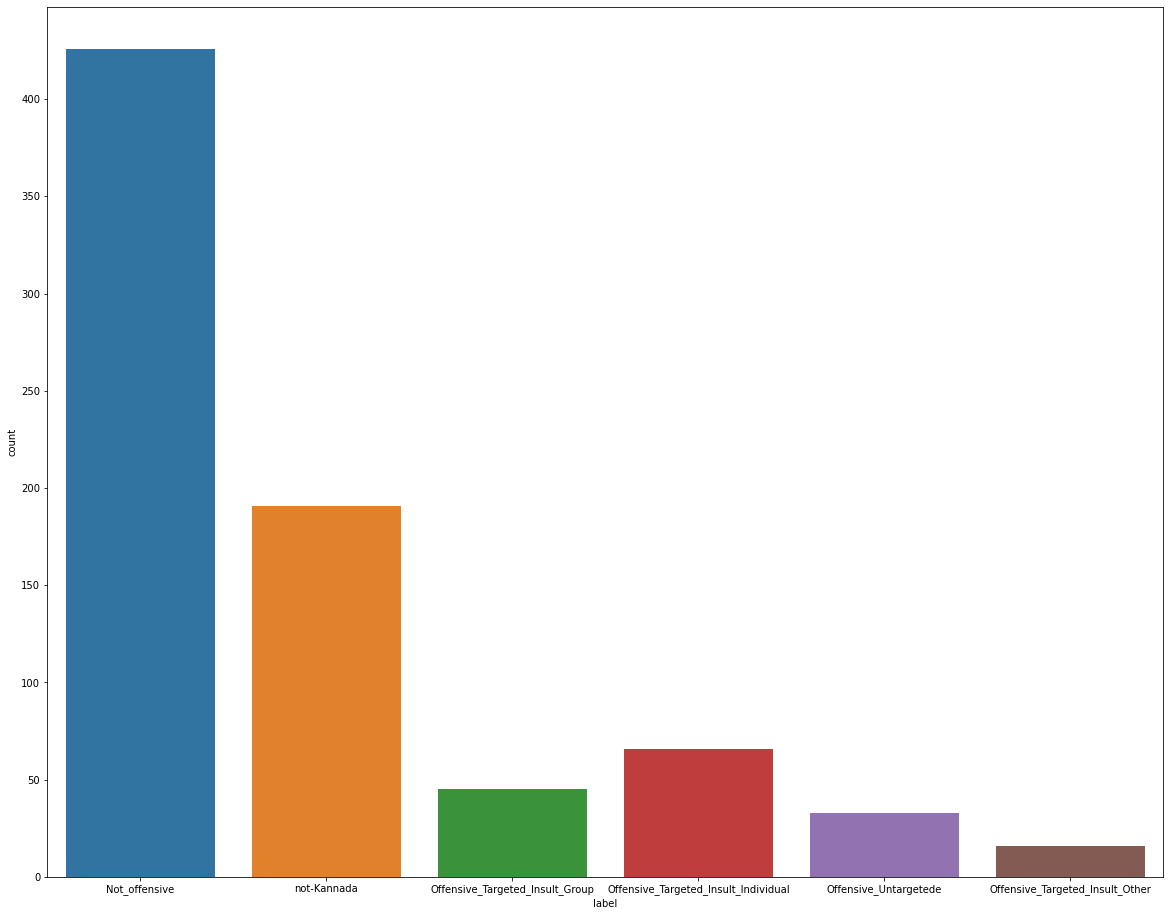

In [35]:
plt.figure(figsize = (20,16))
sns.countplot(x = df2['label'])

In [36]:
df2.to_csv(os.path.join(dataset_dir,'kannada_offensive_dev_corrected.csv'),index = False)